
## Project Description

Modern deep learning hinges on variants of stochastic gradient descent. Give an overview of some of the algorithms (ADAM,
RMSProp, Adagrad,momentum, etc.) and stepsizing schemes (learning rate decay, cosine annealing, superconvergence, hyper-
gradient learning rate adaptation, etc.) and perform an empirical comparison of their performance on some test problems of
your choice. Obviously, no comparison here can be anywhere close to exhaustive due to the overabundance of deep learning op-
timization papers, so just go through a handful of ideas that you find interesting. If you want to do this with realistic (somewhat
large) networks, you’ll probably need access to some GPUs. This will take a bit more work (but should still be doable!) to do
as a project if you don’t have any previous experience in deep learning.




## Text Generation


### Imports

In [1]:
# Reload external files when running cells
%load_ext autoreload
%autoreload 2

# Imports
import torch
import numpy as np
import pathlib
import os
import sys
import matplotlib.pyplot as plt

# Add custom package to import path and import it
file_dir = pathlib.Path().resolve()
pkg_dir = os.path.join(file_dir, "submodules")
print(pkg_dir)
sys.path.insert(0, pkg_dir)
sys.path.insert(0, os.path.join(pkg_dir, "minGPT"))
sys.path.insert(0, os.path.join(pkg_dir, "amath515_pkg"))
from amath515_pkg.src import *

# Load config file
config = helpers.get_config()

# Print matplotlibe plots inline
%matplotlib inline


/home/alexey/School/Classes/AMATH 515/AMATH515_Project/submodules


### Load data

In [12]:

# Loading data
saved_dir = os.path.join(file_dir, 'Saved_Data')
saved_data_d = {"minGPT_loss": list(), "CNN_train_loss": list(), "CNN_test_loss": list(),\
                "CNN_train_acc": list(), "CNN_test_acc": list()} # Dict storing lists of values that we'll plot
for model in ["minGPT", "CNN"]:
    for sgd_method in ["Adam", "AdamW", "RMSprop", "Adagrad"]:
        for scheduler in ["StepLR", "CosineAnnealingLR"]:
            fn = os.path.join(saved_dir, f"{model}_{sgd_method}_{scheduler}.torch")
            saved_data = torch.load(fn)

            if model == 'CNN':
                saved_data_d['CNN_train_loss'].append((f'{sgd_method}, {scheduler}', saved_data['train_loss']))
                saved_data_d['CNN_test_loss'].append((f'{sgd_method}, {scheduler}', saved_data['test_loss']))
                saved_data_d['CNN_train_acc'].append((f'{sgd_method}, {scheduler}', saved_data['train_acc']))
                saved_data_d['CNN_test_acc'].append((f'{sgd_method}, {scheduler}', saved_data['test_acc']))

            elif model == 'minGPT':
                saved_data_d['minGPT_loss'].append((f'{sgd_method}, {scheduler}', saved_data['losses']))


In [16]:

print(saved_data_d['minGPT_loss'][0])


('Adam, StepLR', [4.224329948425293, 3.7739815711975098, 3.5769972801208496, 3.5111682415008545, 3.43544602394104, 3.326680898666382, 3.2802891731262207, 3.213393449783325, 3.151602268218994, 3.1312098503112793, 3.069640636444092, 3.0216493606567383, 3.0289700031280518, 2.9785706996917725, 2.934697151184082, 2.922649621963501, 2.895667314529419, 2.887336492538452, 2.8587806224823, 2.8467698097229004, 2.818909168243408, 2.8018288612365723, 2.7848093509674072, 2.764042377471924, 2.77726411819458, 2.7770559787750244, 2.7546141147613525, 2.7359185218811035, 2.7067415714263916, 2.7113447189331055, 2.712690591812134, 2.677152156829834, 2.708940267562866, 2.7041780948638916, 2.6625468730926514, 2.7151248455047607, 2.701136827468872, 2.6845037937164307, 2.6946020126342773, 2.685678243637085, 2.6678574085235596, 2.6695241928100586, 2.693274974822998, 2.6658902168273926, 2.6650466918945312, 2.6603081226348877, 2.6424026489257812, 2.6670665740966797, 2.6605782508850098, 2.6351311206817627, 2.6661

### Aggregate plots and save them

Saved plot to "/home/alexey/School/Classes/AMATH 515/AMATH515_Project/Plots/Aggregate/CNN_training_accuracies.pdf"


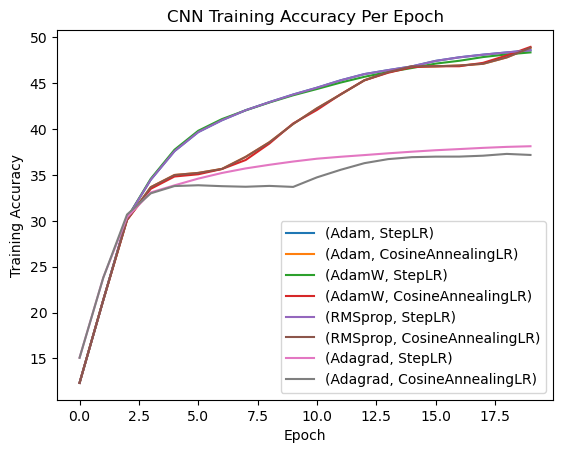

Saved plot to "/home/alexey/School/Classes/AMATH 515/AMATH515_Project/Plots/Aggregate/CNN_testing_accuracies.pdf"


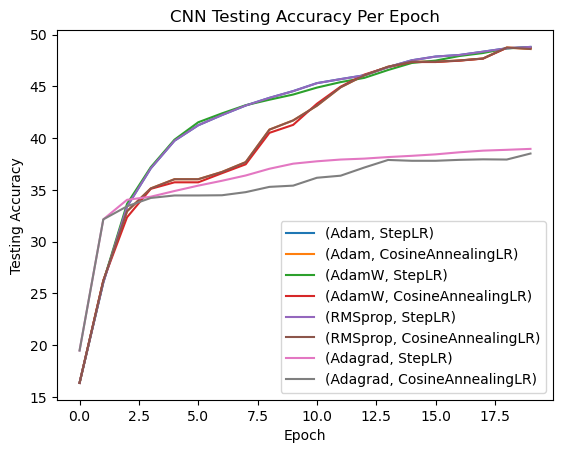

Saved plot to "/home/alexey/School/Classes/AMATH 515/AMATH515_Project/Plots/Aggregate/CNN_training_losses.pdf"


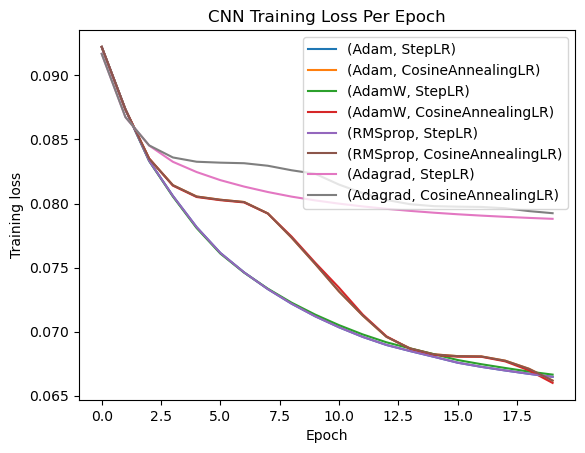

Saved plot to "/home/alexey/School/Classes/AMATH 515/AMATH515_Project/Plots/Aggregate/CNN_testing_losses.pdf"


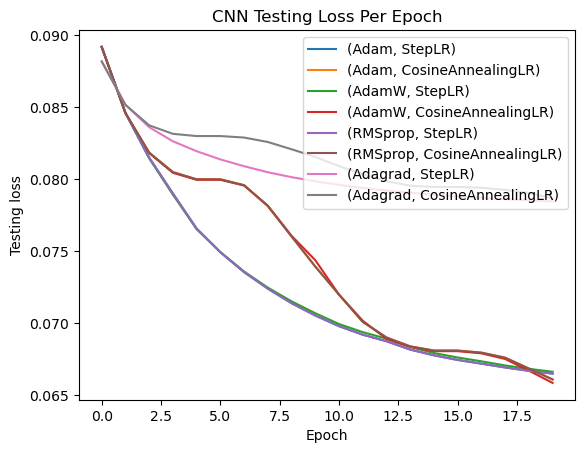

Saved plot to "/home/alexey/School/Classes/AMATH 515/AMATH515_Project/Plots/Aggregate/minGPT_testing_losses.pdf"


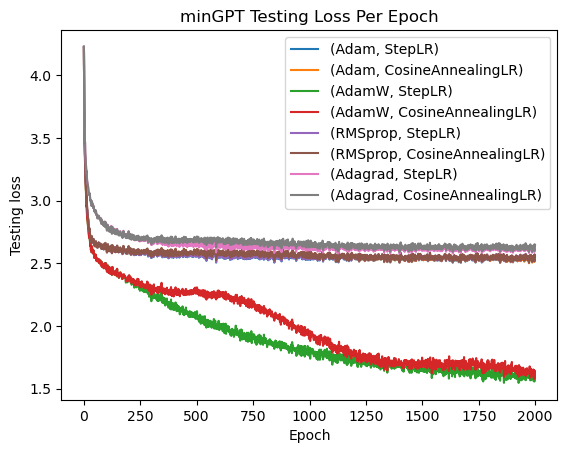

In [20]:

plot_dir = os.path.join(file_dir, "Plots", "Aggregate")
os.makedirs(plot_dir, mode=0o777, exist_ok=True)

def plot_and_save(data, title: str, x_axis: str, y_axis: str, plot_fn: str):
    # Plot losses
    for config_str, data_x in data:
        plt.plot(data_x, label=f"({config_str})")
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.legend()

    # Save losses
    plot_abs = os.path.join(plot_dir, plot_fn)
    plt.savefig(plot_abs)
    print(f"Saved plot to \"{plot_abs}\"")

    plt.show()

# Plot accuracies
plot_fn = f"CNN_training_accuracies.pdf"
plot_and_save(saved_data_d['CNN_train_acc'], "CNN Training Accuracy Per Epoch", "Epoch", "Training Accuracy", plot_fn)

plot_fn = f"CNN_testing_accuracies.pdf"
plot_and_save(saved_data_d['CNN_test_acc'], "CNN Testing Accuracy Per Epoch", "Epoch", "Testing Accuracy", plot_fn)

# Plot losses
plot_fn = f"CNN_training_losses.pdf"
plot_and_save(saved_data_d['CNN_train_loss'], "CNN Training Loss Per Epoch", "Epoch", "Training loss", plot_fn)

plot_fn = f"CNN_testing_losses.pdf"
plot_and_save(saved_data_d['CNN_test_loss'], "CNN Testing Loss Per Epoch", "Epoch", "Testing loss", plot_fn)

plot_fn = f"minGPT_testing_losses.pdf"
plot_and_save(saved_data_d['minGPT_loss'], "minGPT Testing Loss Per Epoch", "Epoch", "Testing loss", plot_fn)
